# 통계 분석 실습 개요 (Titanic 데이터셋 기반)

### **통계 분석의 세 가지 핵심 기법을 Python을 활용하여 학습해보기**

>- **기초 통계 (Basic Statistics)**: 데이터를 요약하고, 중심 경향성과 산포도를 계산하여 전체적인 분포를 이해한다.
>- **기술 통계 (Descriptive Statistics)**: 범주형 변수 기준으로 데이터를 요약하고 시각화하여 패턴을 식별한다.
>- **추론 통계 (Inferential Statistics)**: 표본을 기반으로 전체 집단의 특성을 추정하며, 집단 간 차이를 통계적으로 검정한다.

### 실제 데이터를 바탕으로 통계적 추론의 기본 구조 실습해보기

**T-TEST와 ANOVA(분산분석)** 는 각각 두 집단 간 평균 차이, 세 집단 이상의 평균 차이를 비교할 때 사용한다.

(EX) 실제 데이터로 응용시
- T-TEST는 **남성과 여성의 평균 나이가 서로 다른가**를 검정할 수 있다.
- ANOVA는 **Titanic의 선실 등급(pclass)** 에 따른 승객들의 평균 나이가 서로 다른지를 검정할 수 있다.

이러한 검정에는 공통적으로 **P-value(유의확률)** 라는 개념이 사용된다. 

이는 "관측된 결과가 우연히 발생할 확률"을 의미한다.

- 일반적으로 P-value가 0.05보다 작으면 **귀무가설(H0)을 기각**하고 대립가설을 채택한다.

In [17]:
#!pip install statsmodels
import warnings # 시각화 혹은 모델 실행시 나오는 경고 무시
warnings.filterwarnings('ignore')  

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats # T-TEST 수행
import statsmodels.api as sm # 통계 모델 전반
from statsmodels.formula.api import ols # Ordinary Least Squares, 수식처럼 모델을 정의

## statsmodels & scipy

- **statsmodels**
  
    >통계 모델링과 추론 분석을 위한 고급 라이브러리
    >
    >다양한 선형/비선형 회귀, ANOVA, 시계열 분석, 가설 검정 등을 수행할 수 있음
    >
    >결과를 R과 유사한 형식으로 출력하며 해석에 유리한 요약 정보를 제공함

-  **scipy 라이브러리**
  
    >수학, 과학, 통계 분석용 필수 라이브러리
    >
    >선형대수, 적분, 최적화, 신호 처리 등 폭넓은 기능 포함
    >
    >scipy.stats 모듈은 확률 분포, 가설검정, 통계 계산을 위한 함수들을 포함함

In [19]:
# 데이터 로딩 (Seaborn 내장 Titanic 데이터셋 활용)
df = sns.load_dataset('titanic') 

# 분석에 필요한 열 중심으로 결측치 제거
df = df.dropna(subset=['age', 'sex', 'survived'])
df[['age', 'sex', 'survived']].head() # 분석에 사용되는 열만 확인하기.

,age,sex,survived
0,22.0,male,0
1,38.0,female,1
2,26.0,female,1
3,35.0,female,1
4,35.0,male,0


## 1. 기초 통계 (Basic Statistics)

- 평균, 중앙값, 표준편차, 사분위수 등을 통해 단일 변수(age)의 분포를 수치적으로 파악하기

### 점추정

In [20]:
print("평균 나이:", df['age'].mean())  # 모집단 평균 
print("중앙값 나이:", df['age'].median()) # 모집단 중앙 경향성
print("최솟값 나이:", df['age'].min())  # 데이터 범위 추정 
print("최댓값 나이:", df['age'].max()) # (분포의 극단값)
print("표준편차:", df['age'].std())  # 모집단의 산포도를 단일 수치로 추정
print("분산:", df['age'].var())  # 모집단의 흩어짐을 단일 수치로 추정

# 범위와 분포의 구조를 설명하는 지표 =/= 점추정
print("사분위수:", df['age'].quantile([0.25, 0.5, 0.75]))

평균 나이: 29.69911764705882
중앙값 나이: 28.0
최솟값 나이: 0.42
최댓값 나이: 80.0
표준편차: 14.526497332334042
분산: 211.01912474630805
사분위수: 0.25    20.125
0.50    28.000
0.75    38.000
Name: age, dtype: float64


### 중심극한정리 (Central Limit Theorem, CLT)
- 모집단의 분포가 정규분포가 아니더라도, 크기가 충분한 표본의 평균은 정규분포를 따른다.

- **중요한 이유**
  - 정규분포를 가정한 분석 기법(예: T-검정, 신뢰구간 등)을 비정규분포 데이터에도 적용 가능
  - 실제 데이터가 정규분포가 아니더라도, 표본 평균의 분포가 정규분포에 근사하므로 통계 추론이 가능

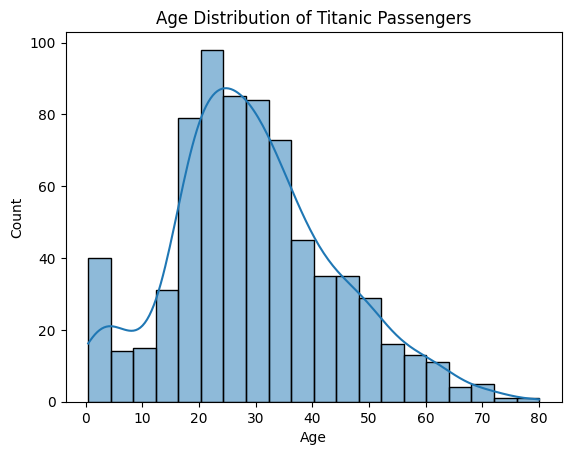

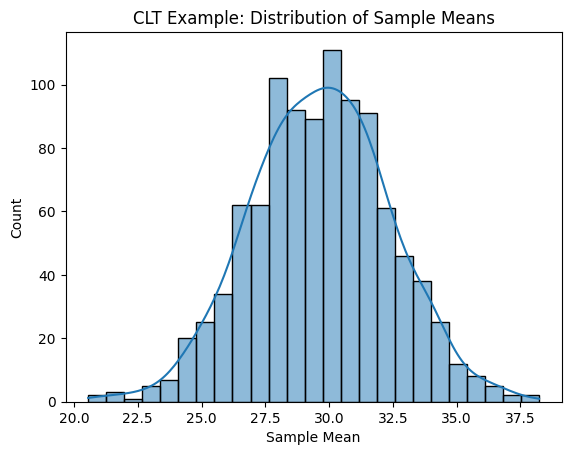

In [27]:
# 실제 승객 샘플의 데이터 분포  =/= 정규 분포가 아님.
sns.histplot(df['age'], kde=True) 
plt.title("Age Distribution of Titanic Passengers")
plt.xlabel("Age")
plt.show()

# 중심극한정리: 샘플 표본 평균의 분포 

# 승객 중 30명을 무작위로 뽑아서 평균을 구하는 걸 1000번 반복
# 1000개의 평균값 리스트 means 생성 (size=30은 랜덤하게 30개 뽑겠다)
means = [np.mean(np.random.choice(df['age'], size=30)) for _ in range(1000)]
sns.histplot(means, kde=True)
plt.title("CLT Example: Distribution of Sample Means")
plt.xlabel("Sample Mean")
plt.show()  # 1000개의 샘플 표본 평균 분포인것

## 2. 기술 통계 (Descriptive Statistics)

- 범주형 변수 기준으로 데이터를 요약하고 시각화하여 패턴을 식별한다.

In [28]:
# 데이터프레임을 특정 열의 값을 기준으로 묶어주는 함수
df.groupby('sex') # male과 female로 데이터가 분리됨. 
df.groupby('sex')['fare'].sum()  # 성별 그룹마다 요금 총합

sex
female    12419.1002
male      12352.7828
Name: fare, dtype: float64

In [29]:
print(df.groupby('sex')['age'].describe())  # 그룹별 요약 통계 (일부 점추정)

        count       mean        std   min   25%   50%   75%   max
sex                                                              
female  261.0  27.915709  14.110146  0.75  18.0  27.0  37.0  63.0
male    453.0  30.726645  14.678201  0.42  21.0  29.0  39.0  80.0


### 신뢰구간(구간추정): 남성 연령 평균 95% CI

남성 평균 나이의 95% 신뢰구간: [29.37, 32.08]
 


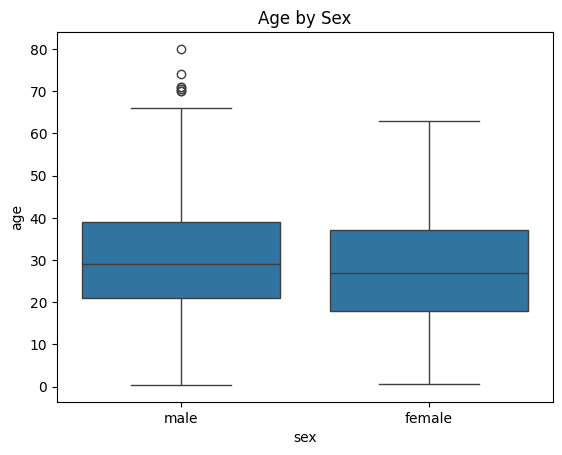

In [32]:
# 정규분포 함수 가져오기
from scipy.stats import norm  

# 1. 남성 그룹 필터링
# df_male = df[df['sex'] == 'male']
df_male = df.groupby('sex').get_group('male') # groupby로도 가능

# 2. 남성 승객들의 나이 평균구하기 
mean_age = df_male['age'].mean() # 표본 평균 반환

# 3. 표준오차 (Standard Error of the Mean) 계산하기 | 표준편차 / √표본크기
sem = df_male['age'].sem() # 평균의 정확도 반환

# 4. 정규분포를 기준으로 95% 신뢰구간을 계산하기 | (평균 위치) | 표준편차 대신 표준오차 사용
ci_low, ci_high = norm.interval(0.95, loc=mean_age, scale=sem) # [신뢰구간 하한, 신뢰구간 상한] 반환

# 5. 신뢰구간 해석하기
print(f"남성 평균 나이의 95% 신뢰구간: [{ci_low:.2f}, {ci_high:.2f}]")
# 모집단 평균(남성 전체 승객 나이 평균)이 이 범위 안에 있을 가능성이 95%다

print(' ')
sns.boxplot(x='sex', y='age', data=df)
plt.title("Age by Sex")
plt.show()

## 3. 추론 통계 (Inferential Statistics)
- 집단 간 평균의 차이가 우연일 가능성이 낮은지 검정하여, 가설이 통계적으로 의미 있는지를 판단한다.

### (1) T-TEST: 남성과 여성의 평균 나이 차이 검정
- T-statistic이 얼마나 큰지를 보고 그게 우연히 일어났을 확률(P-value)을 계산하는 구조

    >**가설**
    >- 귀무가설(H0): 남성과 여성의 평균 나이는 같다.
    >- 대립가설(H1): 남성과 여성의 평균 나이는 다르다.
    >
    >
    >유의 수준 0.05에서 가설을 검정할 것

In [43]:
df_male = df[df['sex'] == 'male']
df_female = df[df['sex'] == 'female']
ttest_result = stats.ttest_ind(df_male['age'], df_female['age'], equal_var=False)
print("성별에 따른 평균 나이 차이 T-test:")

# 1. T-TEST검정 통계량 확인하기 
# T-statistic로 해석의 맥락과 의미를 깊이 있게 설명가능
print("T-statistic:", ttest_result.statistic)
# T-검정은 두 집단의 평균 차이를 표준 오차로 나눈 값을 T-통계량으로 계산

# 2. P-value로 기각 여부 판단
print("P-value:", ttest_result.pvalue)

# 'P-value < 유의수준 0.05': 이런 결과가 5% 미만의 확률로 우연히 발생할 수 있다
print('P-value가 0.01로 유의수준 0.05보다 작기 때문에 귀무가설을 기각한다')  # 대립가설(H₁) 채택

if ttest_result.pvalue < 0.05:
    print("귀무가설 기각: 남성과 여성의 평균 나이는 다르다.")
else:
    print("귀무가설 채택: 남성과 여성의 평균 나이는 같다.")

성별에 따른 평균 나이 차이 T-test:
T-statistic: 2.5258975171938896
P-value: 0.011814913211889735
P-value가 0.01로 유의수준 0.05보다 작기 때문에 귀무가설을 기각한다
귀무가설 기각: 남성과 여성의 평균 나이는 다르다.


### (2) ANOVA: 선실 등급(class)에 따른 평균 나이 비교



#### **선실 등급(pclass)에 따라 승객의 평균 나이에 차이가 있는가?**
- 세 집단(1등실, 2등실, 3등실) 간 평균 나이 차이가 통계적으로 유의한지 분석

    >- 귀무가설(H0): 모든 등급의 평균 나이는 같다.
    >- 대립가설(H1): 적어도 한 그룹의 평균 나이가 다르다.
    >
    >  유의수준 0.0.5에서 가설 검정

In [45]:
# 집단별 데이터 준비하기
df['pclass'] = df['class'].astype('category')  # first’, ‘Second’, ‘Third
# sring에서 category형 변수로 변경해주기.
df['pclass']

0       Third
1       First
2       Third
3       First
4       Third
        ...  
885     Third
886    Second
887     First
889     First
890     Third
Name: pclass, Length: 714, dtype: category
Categories (3, object): ['First', 'Second', 'Third']

In [56]:
# 1. 선형모델(OLS) 생성하기
# 종속변수 age, 독립 변수는 pclass, 선형회귀모델로 범주형 변수의 집단 간 평균 비교하기
anova_model = ols('age ~ C(pclass)', data=df).fit()

# 2. 분산분석(ANOVA) 실행하기
# 집단간 평균 나이가 유의하게 다른지 확인하기
anova_result = sm.stats.anova_lm(anova_model, typ=2)

print("선실 등급별 나이 차이 ANOVA :")
# 3. 결과 확인하기
# PR(>F)이 P-value임
print(anova_result)
print(' ')
pval_anova = anova_result['PR(>F)'][0] # 0.00000000000000000000000749
print(pval_anova) # 소수점 아래 23자리, 숫자 7부터 시작한다는 뜻

# 'P-value < 유의수준 0.05':이런 결과가 5% 미만의 확률로 우연히 발생할 수 있다
print('P-value가 ', pval_anova, '로 유의수준 0.05보다 작기 때문에 귀무가설을 기각한다')  # 대립가설(H₁) 채택

if pval_anova < 0.05:  # 올바른 출력 물은 뒤쪽에
    print("귀무가설 기각 : 선실 등급에 따라 평균 나이가 다르다.") # 선실 등급 간 평균 나이는 유의하게 다르다
else:
    print("귀무가설 채택 : 모든 등급의 평균 나이는 같다.") # 선실 등급 간 평균 나이 차이는 유의하지 않다.

선실 등급별 나이 차이 ANOVA :
                  sum_sq     df          F        PR(>F)
C(pclass)   20929.627754    2.0  57.443484  7.487984e-24
Residual   129527.008190  711.0        NaN           NaN
 
7.487984171960915e-24
P-value가  7.487984171960915e-24 로 유의수준 0.05보다 작기 때문에 귀무가설을 기각한다
귀무가설 기각 : 선실 등급에 따라 평균 나이가 다르다.


# Unsupervised Learning (비지도 학습)

"Unsupervised Learning"은 머신러닝에서 **정답(라벨)** 없이 **데이터의 패턴이나 구조를 스스로 학습**하는 방식이다.

사람이 라벨을 지정해주지 않아도, 모델이 **데이터의 유사성**이나 **잠재적인 군집**을 찾아낼 수 있도록 한다.

---

## Supervised vs Unsupervised

| 구분 | Supervised Learning (지도 학습) | Unsupervised Learning (비지도 학습) |
|------|----------------------------------|--------------------------------------|
| 목적 | 라벨이 있는 데이터를 통해 정답 예측 | 라벨 없이 숨겨진 구조나 패턴 탐색 |
| 예시 | 이메일 스팸 분류, 집값 예측 등 | 고객 세분화, 이상치 탐지 등 |
| 입력 | (특성, 정답) 쌍 (X, y) | 특성만 존재 (X) |
| 출력 | 예측값 (y_hat) | 군집 번호, 축소된 특징 등 |


## Unsupervised Learning의 활용 예시

- 고객을 성향에 따라 분류 (클러스터링)
- 이상 거래 탐지 (이상치 탐지)
- 고차원 데이터 시각화 (차원 축소)
- 이미지 압축, 노이즈 제거 등

---

### 비지도 학습(Unsupervised Learning) 대표 기법 정리

#### 1. Pattern Discovery (패턴 탐색)
- **Association Rule Mining**: 항목 간 연관성 규칙 추출 (Apriori, FP-Growth 등)
  - 예: “우유를 산 고객의 80%는 빵도 구매했다”
  - 지표: Support, Confidence, Lift

#### 2. Clustering (군집화)
- **K-Means**: 중심점(centroid) 기반의 군집화
- **DBSCAN**: 밀도 기반 클러스터링 (잡음 감지 포함)
- **Hierarchical Clustering**: 계층적 구조로 클러스터링 (덴드로그램 시각화)

#### 3. Dimensionality Reduction (차원 축소)
- **PCA (Principal Component Analysis)**: 선형 주성분 분석
- **t-SNE**, **UMAP**: 비선형 차원 축소 기법, 시각화에 유용함



## 핵심 개념 요약

> 비지도 학습은 "정답이 없는 데이터에서 의미 있는 구조나 그룹을 찾아내는 기술"이다.
> 
> 데이터의 분포와 특성을 이해하는 데 핵심적인 도구로,
> 지도 학습 전에 탐색적 분석(EDA)을 위한 필수 단계로 자주 활용된다.


| 알고리즘         | 특징                          |
|------------------|-------------------------------|
| **연관 규칙 분석**       | 데이터 내 항목 간의 연관성을 찾아 규칙을 생성 (예: Apriori 알고리즘) |
| **KMeans**       | 고정된 개수의 중심점 기반 군집화 |
| **DBSCAN**       | 밀도 기반 군집화 + 이상치 감지 가능 |
| **계층적 군집화** | 계층적 구조를 기반으로 한 묶음 (덴드로그램 활용) |
| **PCA**          | 고차원 데이터를 시각화하거나 차원 축소 |


# 연관 규칙 - titanic 실습

- 연관 규칙 분석은 비지도 학습의 한 종류로, 데이터 안에서 자주 함께 발생하는 항목들을 찾아내는 방법이다.
- 주로 장바구니 분석(Market Basket Analysis), 추천 시스템 등에서 사용된다,

In [86]:
# 필요한 라이브러리 (처음 실행 시 한 번만)
# !pip install mlxtend

In [88]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Titanic 데이터셋 로드 및 전처리
df = sns.load_dataset('titanic')

# 주요 변수(성별, 생존 여부, 등급)만 선택하여 one-hot encoding 처리
df_encoded = pd.get_dummies(df[['sex', 'class', 'alive']])

print("[One-hot encoded Titanic DATA]")
print(df_encoded.head())

[One-hot encoded Titanic DATA]
   sex_female  sex_male  class_First  class_Second  class_Third  alive_no  \
0       False      True        False         False         True      True   
1        True     False         True         False        False     False   
2        True     False        False         False         True     False   
3        True     False         True         False        False     False   
4       False      True        False         False         True      True   

   alive_yes  
0      False  
1       True  
2       True  
3       True  
4      False  


In [89]:
# 2. Apriori 알고리즘으로 빈발 항목 집합 추출

frequent_itemsets = apriori(df_encoded, min_support=0.1, use_colnames=True)
print("[빈발 항목 집합 - 최소 지지도 0.1 이상]")
print(frequent_itemsets.head())

[빈발 항목 집합 - 최소 지지도 0.1 이상]
    support        itemsets
0  0.352413    (sex_female)
1  0.647587      (sex_male)
2  0.242424   (class_First)
3  0.206510  (class_Second)
4  0.551066   (class_Third)


In [90]:
# 3. 연관 규칙 생성

# metric='confidence': 신뢰도를 기준으로 필터링
# min_threshold=0.6: 신뢰도 60% 이상인 규칙만 추출 (조건 완화), 보통은 0.7
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.6)
print("[연관 규칙 추출 결과]")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())

[연관 규칙 추출 결과]
     antecedents    consequents   support  confidence      lift
0   (sex_female)    (alive_yes)  0.261504    0.742038  1.933205
1    (alive_yes)   (sex_female)  0.261504    0.681287  1.933205
2     (sex_male)  (class_Third)  0.389450    0.601386  1.091314
3  (class_Third)     (sex_male)  0.389450    0.706721  1.091314
4     (sex_male)     (alive_no)  0.525253    0.811092  1.316362


### 용어 정리:
- **Support**: 전체 거래 중 항목 집합이 등장한 비율, 값이 높을수록 자주 등장하는 항목
- **Confidence**: A → B 규칙에서, A가 나왔을 때 B도 함께 나올 확률, 값이 높을수록 항목 간 관계가 강하다는 뜻
- **Lift**: A와 B의 동시 발생이 우연 이상의 상관관계를 가지는 정도, 값이 1보다 크면 의미 있는 관계가 있다는 뜻

#### 해석:
- 남성 승객은 3등석을 이용하는 경향이 있다 (높은 confidence, lift)
- 1등석 승객은 생존 확률이 높다
- 여성 승객은 생존 확률이 높다 (높은 confidence, lift)
- 3등석 승객은 생존 확률이 낮다 (높은 confidence, lift)

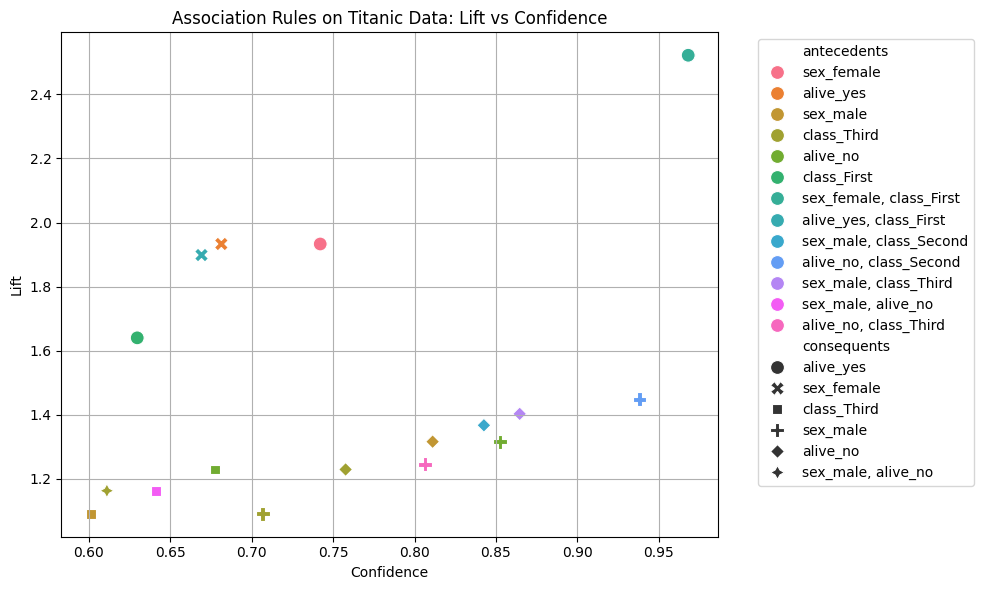

In [92]:
# 4. 연관 규칙 시각화 (Lift vs Confidence)
# 규칙이 존재할 때만 시각화
if not rules.empty:
    rules['antecedents'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
    rules['consequents'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=rules, x='confidence', y='lift', hue='antecedents', style='consequents', s=100)
    plt.title('Association Rules on Titanic Data: Lift vs Confidence')
    plt.xlabel('Confidence')
    plt.ylabel('Lift')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("조건을 만족하는 연관 규칙이 없어 시각화 불가.")

# K-Means 클러스터링 - Iris 데이터 예시

KMeans는 데이터 내에서 그룹 간의 차이를 최대화하고 그룹 내의 차이를 최소화하는 방식으로 데이터를 군집화한다.

### 용어 정리:
- **중심점(Centroid)**: 각 클러스터의 중심을 나타내는 평균적인 위치
- **군집 수(K)**: 데이터가 몇 개의 그룹으로 나뉠지를 미리 설정

In [95]:
from sklearn.datasets import load_iris## KMeans 클러스터링 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Iris 데이터셋 로드
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)

# 데이터 정규화 (KMeans는 거리 기반 알고리즘이기 때문에 중요한 부분)
# StandardScaler: 각 특성의 평균을 0, 표준편차를 1로 변환하여 모든 특성이 동일한 영향력을 갖도록 함
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# KMeans 모델 설정 및 훈련
# KMeans 모델 설정(n_clusters=3): Iris 데이터는 3가지 품종으로 나누어져 있어 K=3으로 설정함.
kmeans = KMeans(n_clusters=3, random_state=42) 
kmeans.fit(scaled_data)

# 클러스터 결과 저장
df['cluster'] = kmeans.labels_

# 결과 확인
print(df.head()) # 클러스터라는 열 생성 후 클러스터 반영됨.

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   cluster  
0        1  
1        1  
2        1  
3        1  
4        1  


In [96]:
# 클러스터 중심점 확인
centers = kmeans.cluster_centers_
print(centers)

[[-0.05021989 -0.88337647  0.34773781  0.2815273 ]
 [-1.01457897  0.85326268 -1.30498732 -1.25489349]
 [ 1.13597027  0.08842168  0.99615451  1.01752612]]


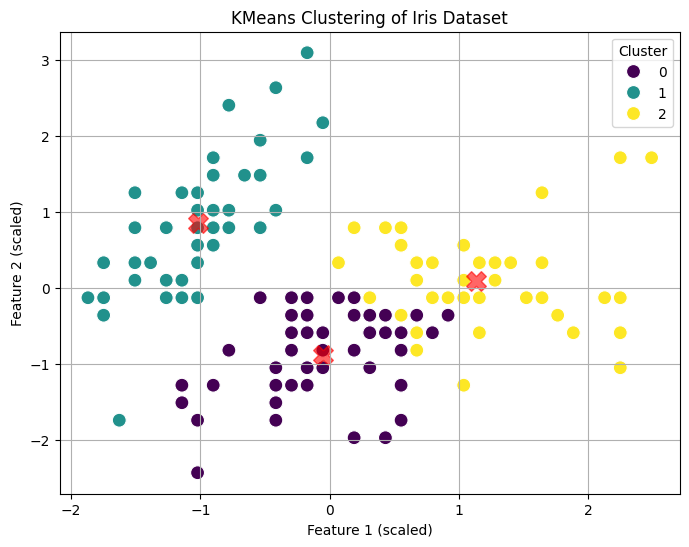

In [97]:
# 클러스터 시각화
plt.figure(figsize=(8, 6))
sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=df['cluster'], palette='viridis', s=100)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, alpha=0.6)
plt.title('KMeans Clustering of Iris Dataset')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.grid(True)
plt.legend(title='Cluster')
plt.show()

# DBSCAN 클러스터링 - make_moons 데이터 예시
밀도 기반의 클러스터링 알고리즘으로, 데이터가 밀집된 지역을 클러스터로 간주하고 밀집되지 않은 지역의 데이터는 잡음(noise)으로 처리하는 특징을 갖는다.

### 용어정리
- **eps(ε)**: 데이터 포인트 주변으로 정의되는 반경
- **min_samples**: 클러스터를 형성하기 위한 최소 이웃 수

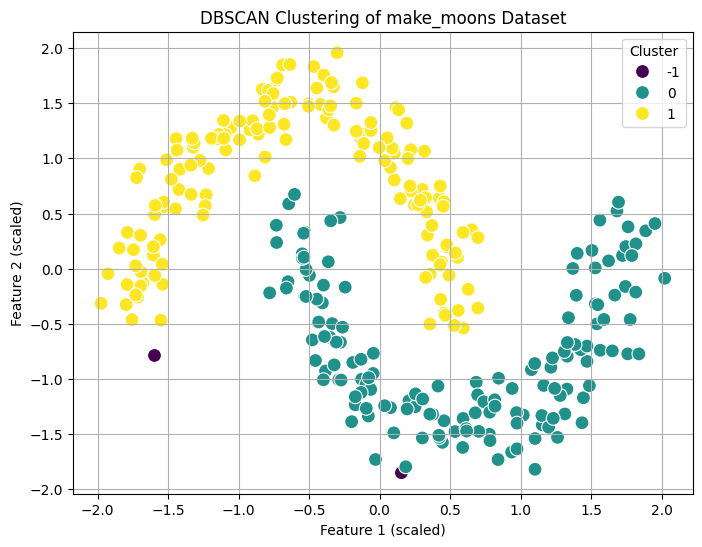

In [99]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# make_moons 데이터 생성 (초승달 모양의 데이터)
X, _ = make_moons(n_samples=300, noise=0.1, random_state=42)

# 데이터 정규화 (거리 기반 알고리즘이라 필수)
scaler = StandardScaler()#### 해석:
X_scaled = scaler.fit_transform(X)

# DBSCAN 모델 설정 및 클러스터링
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(X_scaled)

# 클러스터 결과 저장
labels = dbscan.labels_

# 결과 시각화
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=labels, palette='viridis', s=100)
plt.title('DBSCAN Clustering of make_moons Dataset')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.grid(True)
plt.legend(title='Cluster')
plt.show()

# 계층적 군집화 (Hierarchical Clustering) - 덴드로그램 시각화

 데이터를 계층적인 방식으로 군집화하여 덴드로그램(Dendrogram)이라는 트리 형태로 표현하는 방법
 
 이 방식은 군집 수를 미리 정하지 않고 데이터를 계층적으로 결합하거나 분할한다.

 대표적으로 두 가지 방법이 있다.

> - **Agglomerative Clustering (병합형)**: 각 데이터를 개별 클러스터로 시작하여, 유사한 클러스터끼리 점차 병합해가는 **Bottom-up 방식** Scikit-learn의 기본값
> - **Divisive Clustering (분할형)**: 모든 데이터를 하나의 큰 클러스터로 시작하여, 점점 작게 분할해가는 **Top-down 방식**, 계산량이 많아 실습에서는 잘 사용되지 않지만 개념적으로 중요


### 용어 정리
- **덴드로그램**: 데이터를 계층적으로 묶어 나무 모양으로 시각화한 그래프
- **거리 측정법**: 데이터 간 유사도를 측정하기 위한 방법 (예: 유클리디안 거리)
- **연결 방법(Linkage)**: 군집 간의 거리 측정 방식 (예: 단일 연결, 완전 연결, 평균 연결 등)

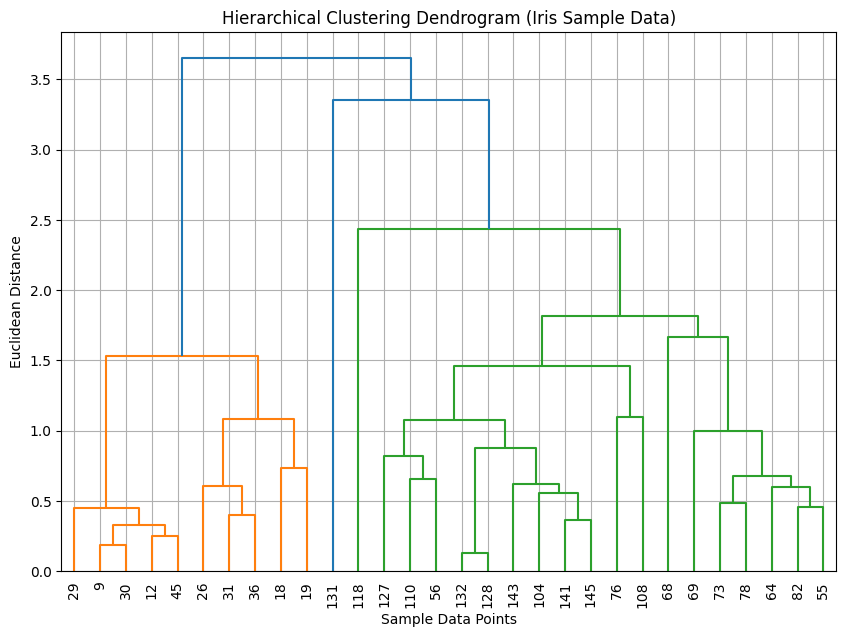

In [105]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Divisive 방식은 구현 복잡도와 계산 비용이 커서 직접 구현하지 않음.

# Iris 데이터셋 로드
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df_sample = df.sample(n=30, random_state=42)  # 무작위로 30개 데이터만 선택

# 데이터 정규화 (거리 기반 알고리즘이라 필수)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_sample)

# 연결 방법으로 linkage matrix 생성 (평균 연결법)
# 데이터 포인트 간의 유사도(거리)를 계산하여 군집 간의 연결을 정의한다.
# 특정 군집 수를 미리 정하지 않고, 데이터 간의 계층적 결합을 통해 자연스러운 그룹을 형성한다.
linked = linkage(scaled_data, method='average')

# 덴드로그램 시각화
plt.figure(figsize=(10, 7))
# 군집이 결합되는 과정을 시각화하여, 데이터를 어떤 방식으로 군집화할 수 있는지 직관적으로 볼 수 있음
dendrogram(linked, labels=df_sample.index, leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram (Iris Sample Data)')
plt.xlabel('Sample Data 
Points')
plt.ylabel('Euclidean Distance') 
plt.grid(True)
plt.show()

#### 핵심:
- 가장 가까운 두 데이터가 먼저 연결되어 작은 클러스터를 형성하고, 점점 거리가 먼 데이터와 연결되면서 클러스터 크기가 점차 커진다.
- 덴드로그램의 선이 크게 상승하는 지점이 데이터 간 유사도가 크게 낮아지는 부분으로 군집 수를 결정하는 기준이 된다.

>- 가로축(데이터 포인트)은 각 데이터 샘플을 나타낸다.
>- 세로축(유클리디안 거리)은 데이터 간의 유사도를 나타냄. 높을수록 데이터 간의 차이가 크다.
>- iris 데이터 셋은 꽃의 품종이 3개임으로 군집이 3개로 형성된다.

#  PCA 차원 축소 기법 - 차원 축소 후 클러스터링 시각화 IRIS data

데이터를 대표하는 주요 성분을 찾아 고차원의 데이터를 저차원으로 축소하는 차원 축소 기법이다. 

PCA를 통해 데이터의 주요 특성을 유지하면서 시각화를 용이하게 할 수 있다.

### 용어 정리
- **PCA(n_components=2)**: 원본 데이터의 차원을 2차원으로 축소하여 주요 특성만을 유지

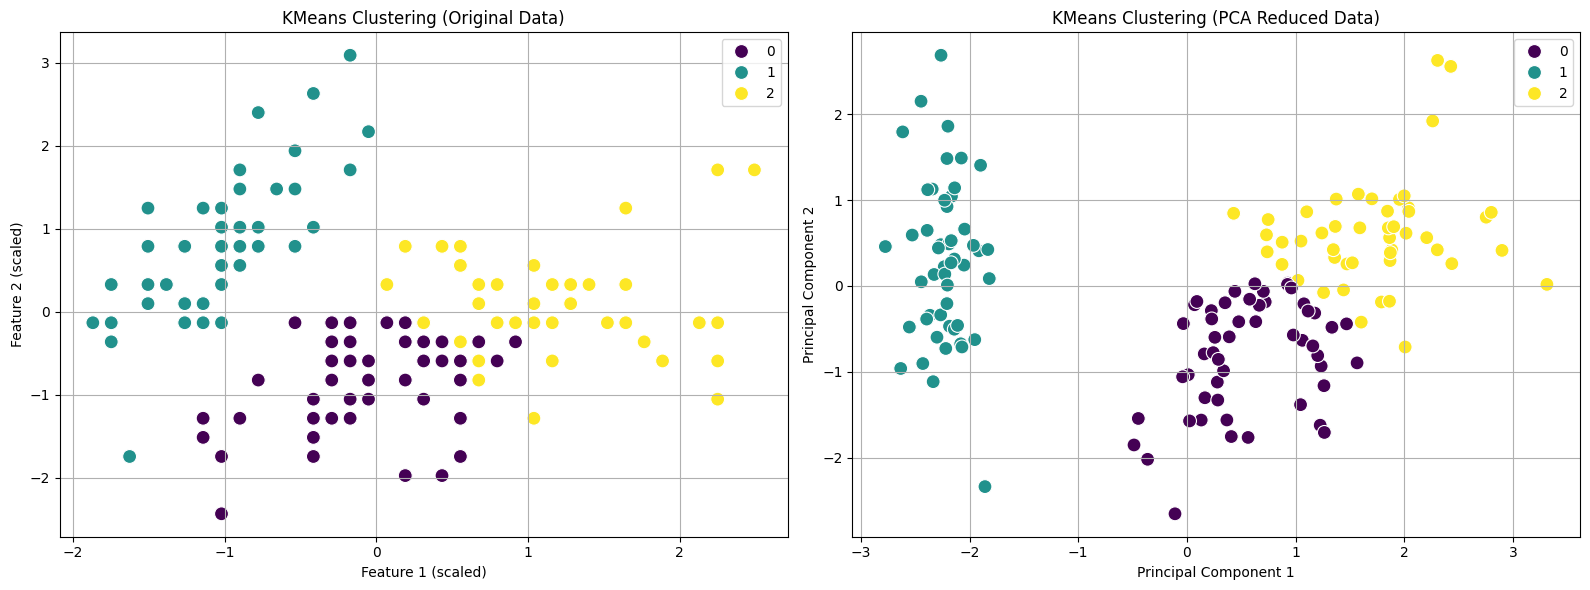

In [104]:
from sklearn.decomposition import PCA

# Iris 데이터셋 로드
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)

# 데이터 정규화
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# PCA로 차원 축소 (2차원으로 축소)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# KMeans 클러스터링 (원본 데이터 기반)
kmeans_original = KMeans(n_clusters=3, random_state=42)
kmeans_original.fit(scaled_data)
original_labels = kmeans_original.labels_

# KMeans 클러스터링 (PCA로 축소한 데이터 기반)
kmeans_pca = KMeans(n_clusters=3, random_state=42)
kmeans_pca.fit(pca_data)
pca_labels = kmeans_pca.labels_

# 시각화 설정
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 원본 데이터 클러스터링 시각화
sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=original_labels, palette='viridis', ax=axes[0], s=100)
axes[0].set_title('KMeans Clustering (Original Data)')
axes[0].set_xlabel('Feature 1 (scaled)')
axes[0].set_ylabel('Feature 2 (scaled)')
axes[0].grid(True)

# PCA 축소 데이터 클러스터링 시각화
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=pca_labels, palette='viridis', ax=axes[1], s=100)
axes[1].set_title('KMeans Clustering (PCA Reduced Data)')
axes[1].set_xlabel('Principal Component 1')
axes[1].set_ylabel('Principal Component 2')
axes[1].grid(True)

plt.tight_layout()
plt.show()

| 알고리즘         | 특징                          |
|------------------|-------------------------------|
| **연관 규칙 분석**       | 데이터 내 항목 간의 연관성을 찾아 규칙을 생성 (예: Apriori 알고리즘) |
| **KMeans**       | 고정된 개수의 중심점 기반 군집화 |
| **DBSCAN**       | 밀도 기반 군집화 + 이상치 감지 가능 |
| **계층적 군집화** | 계층적 구조를 기반으로 한 묶음 (덴드로그램 활용) |
| **PCA**          | 고차원 데이터를 시각화하거나 차원 축소 |